<a href="https://colab.research.google.com/github/jennamacwe/jennamacwe.github.io/blob/main/210411100151_Jennatul_Macwe_UTS_PENDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

**library**

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

**mengambil dataset**

In [61]:
dataset = pd.read_csv('https://raw.githubusercontent.com/datasets/breast-cancer/master/data/breast-cancer.csv')
dataset.head(5)

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


**memisahkan dataset menjadi set pelatihan dan set uji**

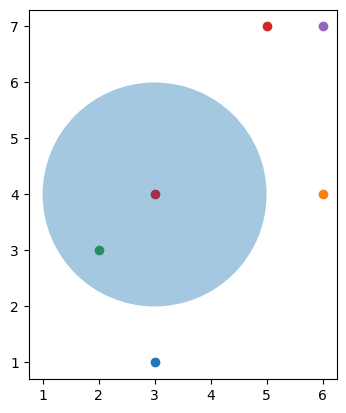

1.4142135623730951


In [62]:
X = np.array([[1, 3],[4, 6],[3, 2],[7, 5],[7, 6]])
for i in range(len(X)):
    plt.scatter(X[i][1], X[i][0])

plt.scatter(3, 4, color='red')
circle = plt.Circle((3, 4), radius=2, alpha=0.4)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

euclidianDis = np.sqrt((3-2)**2 + (4-3)**2)
print(euclidianDis)

In [63]:
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass
    
    #Input: X - features of a trainset
    #       y - labels of a trainset
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = np.max(self.y_train) + 1
     
        
    #This is our function to calculate all nodes/samples in our radius    
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))
    
       
    #our main function is predict
    #All calculation is done by using our test or new samples
    #There are 4 steps to be performed:
    # 1. calculate Prior probability. Ex. P(A) = No_of_elements_of_one_class / total_no_of_samples
    # 2. calculate Margin probability P(X) = No_of_elements_in_radius / total_no_of_samples
    # 3. calculate Likeliyhood (P(X|A) = No_of_elements_of_current_class / total_no_of_samples
    # 4. calculate Posterior probability: P(A|X) = (P(X|A) * P(A)) / P(X)
    # NOTE: Do these steps for all clases in dataset!
    #
    #Inputs: X - test dataset
    #       radius - this parameter is how big circle is going to be around our new datapoint, default = 2
    def predict(self, X, radius=0.4):   
        pred = []
        
        #Creating list of numbers of elements for each class in trainset
        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        
        #Entering the process of prediction
        for t in range(len(X)):
            #Creating empty list for every class probability
            prob_of_classes = []
            #looping through each class in dataset
            for i in range(self.no_of_classes):
                
                #1. step > Prior probability P(class) = no_of_elements_of_that_class/total_no_of_elements
                prior_prob = members_of_class[i]/len(self.y_train)

                #2. step > Margin probability P(X) = no_of_elements_in_radius/total_no_of_elements
                #NOTE: In the same loop collecting infromation for 3. step as well
                
                inRadius_no = 0
                #counter for how many points are from the current class in circle
                inRadius_no_current_class = 0
                
                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                
                #Computing, margin probability
                margin_prob = inRadius_no/len(self.X_train)
                
                #3. step > Likelihood P(X|current_class) = no_of_elements_in_circle_of_current_class/total_no_of_elements
                likelihood = inRadius_no_current_class/len(self.X_train)
                
                #4. step > Posterial Probability > formula from Bayes theorem: P(current_class | X) = (likelihood*prior_prob)/margin_prob
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            
            #Getting index of the biggest element (class with the biggest probability)
            pred.append(np.argmax(prob_of_classes))
                
        return pred

In [64]:
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

In [65]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [72]:
def run():
    # Importing the dataset
    dataset = pd.read_csv('breast-cancer.csv')
    X = dataset.iloc[:, [2, 3]].values
    y = dataset.iloc[:, 4].values
        

    # Splitting the dataset into the Training set and Test set
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Testing my Naive Bayes Classifier
    NB = NaiveBayesClassifier()
    NB.fit(X_train, y_train)
    
    y_pred = NB.predict(X_test, radius=0.4)
    
    #sklearn
    from sklearn.naive_bayes import GaussianNB
    NB_sk = GaussianNB()
    NB_sk.fit(X_train, y_train)
    
    sk_pred = NB_sk.predict(X_test)
     
    
    print("Accuracy for my Naive Bayes Classifier: ", accuracy(y_test, y_pred), "%")
    print("Accuracy for sklearn Naive Bayes Classifier: ",accuracy(y_test, sk_pred), "%")

In [73]:
run()

ModuleNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN

**import library**

In [75]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset

**mengambil dataset**

In [76]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/breast-cancer/master/data/breast-cancer.csv")
df.head()

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


**melihat ukuran dataset**

In [77]:
df.shape

(272, 10)

**membagi data ke X dan Y**

In [78]:
# X tanpa label
df = df.dropna()

X = df[['deg-malig']]
y = df['class']
df.head()

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events


In [79]:
#y labelnya saja
y = df["class"].values
y[0:272]

array(['recurrence-events', 'false-recurrence-events',
       'recurrence-events', 'false-recurrence-events',
       'recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'recurrence-events', 'recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'fal

**membagi data ke data test dan data training**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [81]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

**membangun KNN classifier**

In [82]:
KNeighborsClassifier(
    n_neighbors=5,          # The number of neighbours to consider
    weights='uniform',      # How to weight distances
    algorithm='auto',       # Algorithm to compute the neighbours
    leaf_size=30,           # The leaf size to speed up searches
    p=2,                    # The power parameter for the Minkowski metric
    metric='minkowski',     # The type of distance to use
    metric_params=None,     # Keyword arguments for the metric function
    n_jobs=None             # How many parallel jobs to run
)

KNeighborsClassifier()

In [83]:
# Creating a classifier object in sklearn
clf = KNeighborsClassifier(p=1)

In [84]:
# Fitting our model
clf.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [85]:
predictions = clf.predict(X_test)
print(predictions)

['false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-events'
 'false-recurrence-events' 'false-recurrence-e

In [86]:
predictions = clf.predict([[44.2]])
print(predictions)

['false-recurrence-events']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [87]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[ 1.23750385],
       [ 1.23750385],
       [ 1.23750385],
       [-0.09467243],
       [ 1.23750385]])

In [88]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
knn.predict(X_test)[0:5]

array(['false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events', 'false-recurrence-events',
       'false-recurrence-events'], dtype=object)

In [90]:
knn.score(X_test, y_test)

0.7272727272727273

In [91]:
from sklearn.metrics import *
import numpy as np

#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, knn.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, knn.predict(X_test)))

                         precision    recall  f1-score   support

false-recurrence-events       0.73      1.00      0.84        48
      recurrence-events       0.00      0.00      0.00        18

               accuracy                           0.73        66
              macro avg       0.36      0.50      0.42        66
           weighted avg       0.53      0.73      0.61        66

Accuracy: 0.7272727272727273


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
